# PreMODIT: The robust range of temperature as a function of dE  

## What is the elower grid trange file?

The elower grid trange file contains the robust temeprature range, Tl and Th as a function of $\Delta E$, $T_\mathrm{ref}$, and $T_\mathrm{wt}$. 

Default elower_grid_trange file version=
(2, 75, 75, 39, 3)
(2, 75, 75, 39, 3)
Twt=263.24731128422394K, Tref=151.19987194788087K


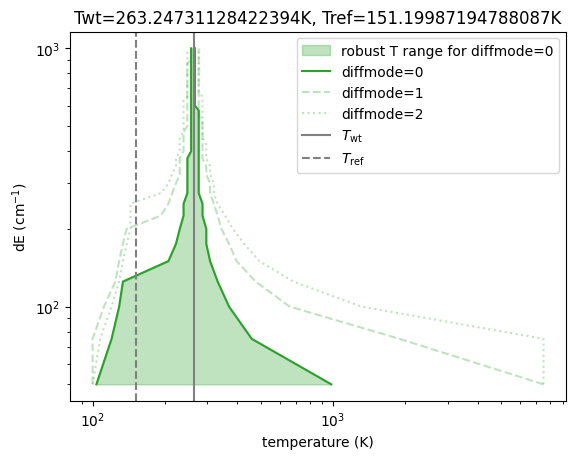

In [1]:
from exojax.spec.lbderror import default_elower_grid_trange_file
import numpy as np

filename = default_elower_grid_trange_file(version=2)
dat = np.load(filename)
arr = dat["arr_0"]
Tarr = dat["arr_1"] # np.logspace(np.log10(100),np.log10(5000),120)
Twtarr = dat["arr_2"] #np.logspace(np.log10(100.1),np.log10(2000.1),50)
Trefarr = dat["arr_3"] #Trefarr - np.logspace(np.log10(100),np.log10(2000),50)
dEarr = dat["arr_4"] #dEarr - np.linspace(100,1500,29)

print(np.shape(arr)) # (tl/th, len(Twtarr), len(Trefarr), len(dEarr), diffmode0,1,2)
print((2, len(Twtarr), len(Trefarr), len(dEarr),3))

i = 30
j = 20
Twt = Twtarr[i]
Tref = Trefarr[j]
subscript = "Twt="+str(Twt)+"K, Tref="+str(Tref)+"K"
print(subscript)


import matplotlib.pyplot as plt
diffmode = 0
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]

plt.fill_betweenx(dEarr, tlow, thigh, color="C2", alpha=0.3, label="robust T range for diffmode=0")
plt.plot(tlow, dEarr, color="C2", label="diffmode=0")
plt.plot(thigh, dEarr, color="C2")

diffmode = 1
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]
plt.plot(tlow, dEarr, color="C2", alpha=0.3, ls="dashed", label="diffmode=1")
plt.plot(thigh, dEarr, color="C2", alpha=0.3, ls="dashed")


diffmode = 2
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]
plt.plot(tlow, dEarr, color="C2", alpha=0.3, ls="dotted", label="diffmode=2")
plt.plot(thigh, dEarr, color="C2", alpha=0.3, ls="dotted")


plt.axvline()
plt.axvline(Twt,label="$T_\mathrm{wt}$",color="gray")
plt.axvline(Tref,label="$T_\mathrm{ref}$",ls="dashed",color="gray")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("temperature (K)")
plt.ylabel("dE ($\\mathrm{cm}^{-1}$)")
plt.legend()
plt.title(subscript)
plt.show()